# Fit Example
This notebook will go through fitting data from Sonnet to the loop model.
For more detailed information, checkout the docstrings for each function.

We start with the standard import statements. (matplotlib is not a requirement
for this library, so it must be installed separately for this notebook to run).

In [1]:
import pathlib
import numpy as np
import loopfit as lf
import matplotlib.pyplot as plt

%matplotlib inline

First we have to load in the data from Sonnet. One of the most common Sonnet
output file types is the touchstone format, which is also used with many
network analyzers. `loopfit` comes with a utility to load these files.

In [2]:
folder = pathlib.Path().parent.absolute()
f, i, q = lf.load_touchstone(folder / "sonnet_resonator_data.ts")

Next we create a guess and fit the data. Note how phase0 and phase1 are fixed
in the guess. Sonnet simulations with very low loss will often confuse the
phase estimation, so it's better to fix it. For simulations with short
transmission lines, the phase offset and delay are typically near zero.

In [3]:
guess = lf.guess(f, i ,q, phase0=0, phase1=0)
result = lf.fit(f, i, q, **guess)
print(result['summary'])

Solver Summary (v 2.0.0-eigen-(3.4.0)-lapack-suitesparse-(5.10.1)-cxsparse-(3.2.0)-eigensparse-no_openmp)

                                     Original                  Reduced
Parameter blocks                            5                        2
Parameters                                 14                        9
Residual blocks                           950                      950
Residuals                                1900                     1900

Minimizer                        TRUST_REGION

Dense linear algebra library            EIGEN
Trust region strategy     LEVENBERG_MARQUARDT

                                        Given                     Used
Linear solver                        DENSE_QR                 DENSE_QR
Threads                                     1                        1
Linear solver ordering              AUTOMATIC                        2

Cost:
Initial                          2.160576e+00
Final                            1.221718e-05
Change        

The fit can be plotted by evaluating the model at the desired frequencies. All
the fit parameters are contained in the results dictionary.

f0: 5.94762 qi: 2.28908e+06 qc: 43414.3


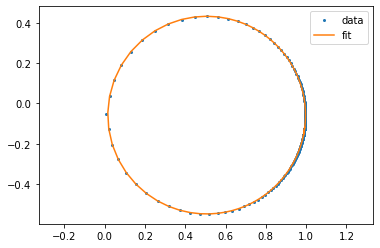

In [4]:
model = lf.model(f, **result)
plt.plot(i, q, 'o', markersize=2, label='data')
plt.plot(model.real, model.imag, label='fit')
plt.legend()
plt.axis('equal')
keys = ["f0", "qi", "qc"]
print(*[key + f": {result[key]:g}" for key in keys])